In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

num_points = 200
dim = 3
new_dim = 2

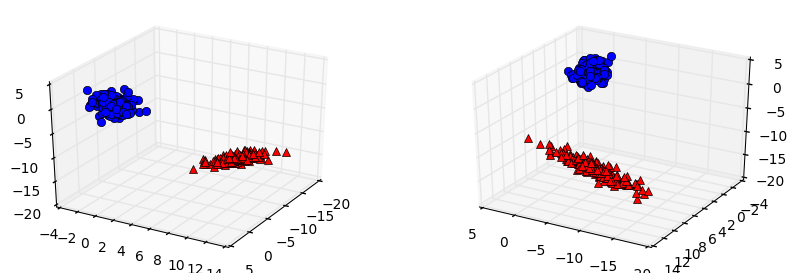

In [2]:
np.random.seed(10)

mean = np.zeros(dim) #mean
cov = np.identity(dim) #covariance matrix
X = np.random.multivariate_normal(mean, cov, size=num_points)

mu = np.random.uniform(-15, 15, dim)
A = np.random.uniform(-1, 2, (dim, dim)) + np.random.uniform(1, 2)*np.identity(dim)
Z = mu + np.dot(X, A)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')
plt.plot(X[:,0], X[:,1], X[:,2], 'o', color="blue")
plt.plot(Z[:,0], Z[:,1], Z[:,2], '^', color="red")
plt.gca().set_aspect('equal')
plt.grid()
ax.view_init(30,30)

ax = fig.add_subplot(122, projection='3d')
plt.plot(X[:,0], X[:,1], X[:,2], 'o', color="blue")
plt.plot(Z[:,0], Z[:,1], Z[:,2], '^', color="red")
plt.gca().set_aspect('equal')
plt.grid()
ax.view_init(30,120)

plt.show()

In [3]:
# Concatenate all examples and compute mean for each coordinate
all_samples = np.concatenate((X, Z), axis=0)
mu_hat = np.mean(all_samples, axis=0)

In [4]:
X_centered = all_samples - mu_hat
print(np.mean(X_centered, axis=0))

[ -9.45910017e-16   1.01252340e-15   3.01536573e-15]


In [5]:
# Covariance matrix by hand
X_cov = np.dot(X_centered.T, X_centered) / (len(X_centered) - 1)
print(X_cov)

[[ 22.06696766 -20.12783823  26.91732993]
 [-20.12783823  25.0978062  -26.34672006]
 [ 26.91732993 -26.34672006  35.68581589]]


In [6]:
# Verify the covariance matrix
X_cov2 = np.cov(all_samples.T)
print('Covariance matrix:\n', X_cov2)

Covariance matrix:
 [[ 22.06696766 -20.12783823  26.91732993]
 [-20.12783823  25.0978062  -26.34672006]
 [ 26.91732993 -26.34672006  35.68581589]]


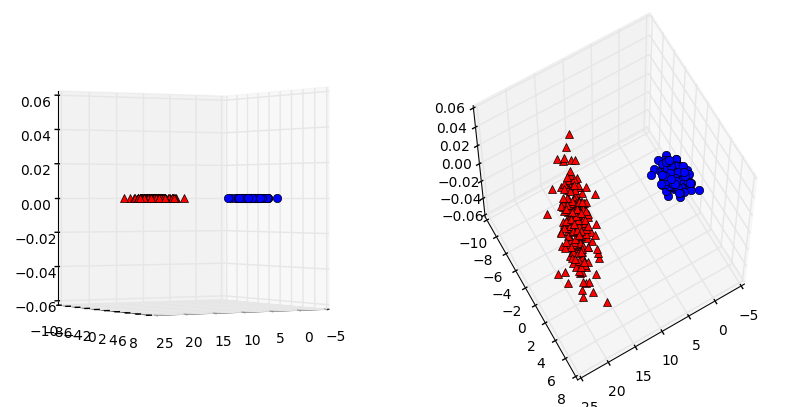

In [7]:
# compute SVD of the covariance matrix
U, s, V = np.linalg.svd(X_cov, full_matrices=True)
points2D = np.dot(all_samples, U[:,:new_dim])

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')
ax.view_init(0,60)
plt.plot(points2D[:num_points,0], points2D[:num_points,1], 'o', markersize=6, color='blue')
plt.plot(points2D[num_points:,0], points2D[num_points:,1], '^', markersize=6, color='red')
plt.grid()

ax = fig.add_subplot(122, projection='3d')
ax.view_init(60,60)
plt.plot(points2D[:num_points,0], points2D[:num_points,1], 'o', markersize=6, color='blue')
plt.plot(points2D[num_points:,0], points2D[num_points:,1], '^', markersize=6, color='red')
plt.grid()

plt.show()